In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
def show_image(title, image):
    image = cv.resize(image, (0, 0), fx=0.3, fy=0.3)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert color for Matplotlib
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [16]:
def extrage_careu(image):
    image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    image_m_blur = cv.medianBlur(image,3)
    image_g_blur = cv.GaussianBlur(image_m_blur, (0, 0), 5) 
    image_sharpened = cv.addWeighted(image_m_blur, 1.2, image_g_blur, -0.8, 0)
    show_image('image_sharpened',image_sharpened)
    _, thresh = cv.threshold(image_sharpened, 30, 255, cv.THRESH_BINARY)

    kernel = np.ones((3, 3), np.uint8)
    thresh = cv.erode(thresh, kernel)
    show_image('image_thresholded',thresh)

    edges =  cv.Canny(thresh ,200,400)
    show_image('edges',edges)
    contours, _ = cv.findContours(edges,  cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    max_area = 0
   
    # for i in range(len(contours)):
    #     if(len(contours[i]) >3):
    #         possible_top_left = None
    #         possible_bottom_right = None
    #         for point in contours[i].squeeze():
    #             if possible_top_left is None or point[0] + point[1] < possible_top_left[0] + possible_top_left[1]:
    #                 possible_top_left = point
    # 
    #             if possible_bottom_right is None or point[0] + point[1] > possible_bottom_right[0] + possible_bottom_right[1] :
    #                 possible_bottom_right = point
    # 
    #         diff = np.diff(contours[i].squeeze(), axis = 1)
    #         possible_top_right = contours[i].squeeze()[np.argmin(diff)]
    #         possible_bottom_left = contours[i].squeeze()[np.argmax(diff)]
    #         if cv.contourArea(np.array([[possible_top_left],[possible_top_right],[possible_bottom_right],[possible_bottom_left]])) > max_area:
    #             max_area = cv.contourArea(np.array([[possible_top_left],[possible_top_right],[possible_bottom_right],[possible_bottom_left]]))
    #             top_left = possible_top_left
    #             bottom_right = possible_bottom_right
    #             top_right = possible_top_right
    #             bottom_left = possible_bottom_left
    # 
    # width = 810
    # height = 810
    # 
    # image_copy = cv.cvtColor(image.copy(),cv.COLOR_GRAY2BGR)
    # cv.circle(image_copy,tuple(top_left),20,(0,0,255),-1)
    # cv.circle(image_copy,tuple(top_right),20,(0,0,255),-1)
    # cv.circle(image_copy,tuple(bottom_left),20,(0,0,255),-1)
    # cv.circle(image_copy,tuple(bottom_right),20,(0,0,255),-1)
    # show_image("detected corners",image_copy)
    # 
    # #completati codul aici
    
    return result

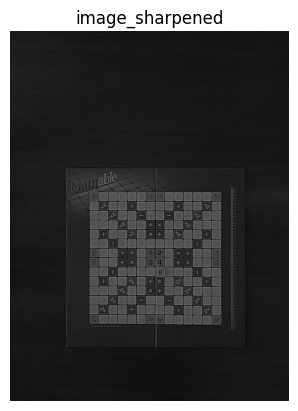

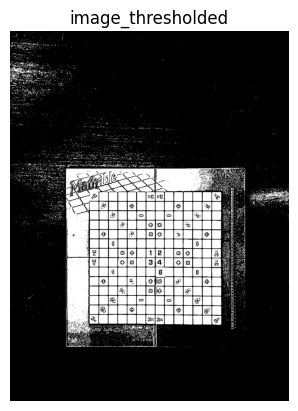

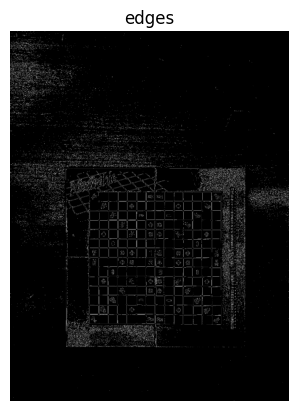

NameError: name 'result' is not defined

In [17]:
img = cv.imread('antrenare/1_01.jpg')
result=extrage_careu(img)
show_image('img',result)

In [7]:
lines_horizontal=[]
for i in range(0,811,90):
    l=[]
    l.append((0,i))
    l.append((809,i))
    lines_horizontal.append(l)

In [8]:
lines_vertical=[]
for i in range(0,811,90):
    l=[]
    l.append((i,0))
    l.append((i,809))
    lines_vertical.append(l)

In [10]:
img = cv.imread('data/train/01.jpg')
result=extrage_careu(img)
show_image('img',result)
for line in  lines_vertical : 
    cv.line(result, line[0], line[1], (0, 255, 0), 5)
    for line in  lines_horizontal : 
        cv.line(result, line[0], line[1], (0, 0, 255), 5)
show_image('img',result)

In [6]:
def determina_configuratie_careu_ox(thresh,lines_horizontal,lines_vertical):
    matrix = np.empty((9,9), dtype='str')
    for i in range(len(lines_horizontal)-1):
        for j in range(len(lines_vertical)-1):
            y_min = lines_vertical[j][0][0] 
            y_max = lines_vertical[j + 1][1][0]
            x_min = lines_horizontal[i][0][1] 
            x_max = lines_horizontal[i + 1][1][1] 
            patch = thresh[x_min:x_max, y_min:y_max].copy()
            #completati codul aici
            
    return matrix

In [7]:
def vizualizare_configuratie(result,matrix,lines_horizontal,lines_vertical):
    for i in range(len(lines_horizontal) - 1):
        for j in range(len(lines_vertical) - 1):
            y_min = lines_vertical[j][0][0]
            y_max = lines_vertical[j + 1][1][0]
            x_min = lines_horizontal[i][0][1]
            x_max = lines_horizontal[i + 1][1][1]
            if matrix[i][j] == 'x': 
                cv.rectangle(result, (y_min, x_min), (y_max, x_max), color=(255, 0, 0), thickness=5)

In [27]:
def clasifica_cifra(patch):
        maxi=-np.inf
        poz=-1
        for j in range(1,10):
            img_template=cv.imread('templates/'+str(j)+'.jpg')
            img_template= cv.cvtColor(img_template,cv.COLOR_BGR2GRAY)
            corr = cv.matchTemplate(patch,img_template,  cv.TM_CCOEFF_NORMED)
            corr=np.max(corr)
            #completati codul aici
        return poz

In [32]:
def determina_configuratie_careu_ocifre(img,thresh,lines_horizontal,lines_vertical):
    matrix = np.empty((9,9), dtype='str')
    for i in range(len(lines_horizontal)-1):
        for j in range(len(lines_vertical)-1):
            y_min = lines_vertical[j][0][0] 
            y_max = lines_vertical[j + 1][1][0] 
            x_min = lines_horizontal[i][0][1]
            x_max = lines_horizontal[i + 1][1][1] 
            patch = thresh[x_min:x_max, y_min:y_max].copy()
            patch_orig=img[x_min:x_max, y_min:y_max].copy()
            patch_orig= cv.cvtColor(patch_orig,cv.COLOR_BGR2GRAY)
            #completati codul aici
    return matrix